In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import joblib

import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
from IPython.display import display, HTML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import shap 
import lime# SHAP for explainability
from lime.lime_tabular import LimeTabularExplainer  # LIME for local explanations
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import time
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf





# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt) #ensures any changes made to matplotlib.pyplot during the session are applied.
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

c:\Users\tonya\Anaconda3\envs\fl_project_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

df = pd.read_csv('dataset/edge_iiot.csv', low_memory=False)

# Set test size and random state for reproducibility
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Attack_type','Attack_label'], axis=1), df['Attack_type'], test_size=test_size, random_state=random_state,stratify=df['Attack_type'])


In [3]:

# Set Random Seed
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
hidden_layer_sizes = (20, 20)  # Hidden layer configuration
batch_size = 2000  # Batch size for MLP
learning_rate = 0.001  # Learning rate for MLP


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Re-initialize the model to ensure clean start
model = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    solver='adam',
    batch_size=batch_size,
    learning_rate_init=learning_rate,
    max_iter=1,  # Train for 1 epoch at a time
    warm_start=True,  # Keep training without reinitializing weights
    verbose=False
)


train_time = time.time()

for epoch in range(12):
    model.fit(X_train, y_train)

# Final evaluation
y_pred = model.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")


print("\nEvaluation on test set:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"Training time: {time.time() - train_time:.2f} seconds")




Evaluation on test set:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      4805
           1       0.93      0.91      0.92      9709
           2       1.00      1.00      1.00     13588
           3       1.00      1.00      1.00     10012
           4       1.00      1.00      1.00     24314
           5       0.83      0.46      0.59       171
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00    272800
           8       0.77      0.83      0.80      9987
           9       0.92      1.00      0.96      3995
          10       0.75      0.31      0.44      1938
          11       0.94      0.75      0.83     10165
          12       0.76      0.89      0.82      7361
          13       0.97      0.94      0.96     10005
          14       0.76      0.89      0.82      3013

    accuracy                           0.98    381935
   macro avg       0.89      0.86      0.87    381935
w

In [4]:
# # Set Random Seed
# seed = 42
# np.random.seed(seed)
# random.seed(seed)
# tf.random.set_seed(seed)

# hidden_layer_sizes = (20, 20)  # Hidden layer configuration
# batch_size = 2000  # Batch size for MLP
# learning_rate = 0.001  # Learning rate for MLP

# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# import time
# import numpy as np

# # Method 1: Using sklearn's built-in early stopping
# print("Method 1: Using sklearn's built-in early stopping")
# print("-" * 50)

# # Split training data to create validation set for early stopping
# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=seed, stratify=y_train
# )

# model_builtin = MLPClassifier(
#     hidden_layer_sizes=hidden_layer_sizes,
#     activation='relu',
#     solver='adam',
#     batch_size=batch_size,
#     learning_rate_init=learning_rate,
#     max_iter=1000,  # Maximum iterations
#     early_stopping=True,  # Enable early stopping
#     validation_fraction=0.2,  # Fraction of training data to use for validation
#     n_iter_no_change=10,  # Stop if no improvement for 10 consecutive epochs
#     tol=1e-4,  # Tolerance for optimization
#     random_state=seed,
#     verbose=True
# )

# train_time = time.time()
# model_builtin.fit(X_train, y_train)
# train_time_builtin = time.time() - train_time

# print(f"Training stopped at iteration: {model_builtin.n_iter_}")
# print(f"Training time: {train_time_builtin:.2f} seconds")

# # Evaluate built-in early stopping model
# y_pred_builtin = model_builtin.predict(X_test)
# accuracy_builtin = accuracy_score(y_test, y_pred_builtin)
# print(f"Accuracy with built-in early stopping: {accuracy_builtin:.4f}")

# print("\n" + "="*70 + "\n")

# # Method 2: Custom early stopping with manual convergence detection
# print("Method 2: Custom early stopping with convergence detection")
# print("-" * 50)

# def check_convergence(losses, patience=5, min_delta=1e-4):
#     """
#     Check if training has converged based on loss improvements
    
#     Args:
#         losses: List of loss values
#         patience: Number of epochs to wait for improvement
#         min_delta: Minimum change to qualify as improvement
    
#     Returns:
#         bool: True if converged, False otherwise
#     """
#     if len(losses) < patience + 1:
#         return False
    
#     # Check if loss hasn't improved for 'patience' epochs
#     recent_losses = losses[-patience-1:]
#     best_loss = min(recent_losses[:-1])
#     current_loss = recent_losses[-1]
    
#     # Check if current loss is not significantly better than best recent loss
#     if current_loss >= best_loss - min_delta:
#         return True
#     return False

# # Initialize model for custom early stopping
# model_custom = MLPClassifier(
#     hidden_layer_sizes=hidden_layer_sizes,
#     activation='relu',
#     solver='adam',
#     batch_size=batch_size,
#     learning_rate_init=learning_rate,
#     max_iter=1,  # Train for 1 epoch at a time
#     warm_start=True,  # Keep training without reinitializing weights
#     random_state=seed,
#     verbose=False
# )

# # Training with custom convergence detection
# train_losses = []
# val_accuracies = []
# max_epochs = 200
# patience = 10
# min_delta = 1e-4

# train_time = time.time()

# for epoch in range(max_epochs):
#     # Train for one epoch
#     model_custom.fit(X_train_split, y_train_split)
    
#     # Get training loss (approximate using score)
#     train_score = model_custom.score(X_train_split, y_train_split)
#     train_loss = 1 - train_score  # Convert accuracy to loss approximation
#     train_losses.append(train_loss)
    
#     # Get validation accuracy
#     val_accuracy = model_custom.score(X_val_split, y_val_split)
#     val_accuracies.append(val_accuracy)
    
#     print(f"Epoch {epoch+1:3d}: Train Loss: {train_loss:.6f}, Val Accuracy: {val_accuracy:.6f}")
    
#     # Check for convergence
#     if check_convergence(train_losses, patience=patience, min_delta=min_delta):
#         print(f"\nConverged! Training stopped at epoch {epoch+1}")
#         print(f"No improvement for {patience} consecutive epochs")
#         break
    
#     # Additional stopping criteria
#     if len(val_accuracies) > 1:
#         # Stop if validation accuracy is decreasing consistently (overfitting)
#         if len(val_accuracies) >= 5:
#             recent_val_acc = val_accuracies[-5:]
#             if all(recent_val_acc[i] >= recent_val_acc[i+1] for i in range(len(recent_val_acc)-1)):
#                 print(f"\nEarly stopping due to overfitting at epoch {epoch+1}")
#                 break

# train_time_custom = time.time() - train_time

# # Evaluate custom early stopping model
# y_pred_custom = model_custom.predict(X_test)
# accuracy_custom = accuracy_score(y_test, y_pred_custom)
# precision_custom = precision_score(y_test, y_pred_custom, average="weighted")
# recall_custom = recall_score(y_test, y_pred_custom, average="weighted")
# f1_custom = f1_score(y_test, y_pred_custom, average="weighted")

# print(f"\nFinal Results (Custom Early Stopping):")
# print(f"Training time: {train_time_custom:.2f} seconds")
# print(f"Total epochs trained: {len(train_losses)}")
# print("\nEvaluation on test set:")
# print(classification_report(y_test, y_pred_custom))
# print("Accuracy:", accuracy_custom)
# print("Precision:", precision_custom)
# print("Recall:", recall_custom)
# print("F1 Score:", f1_custom)

# print("\n" + "="*70 + "\n")

# # Method 3: Advanced convergence detection with multiple criteria
# print("Method 3: Advanced convergence detection")
# print("-" * 50)

# def advanced_convergence_check(train_losses, val_accuracies, epoch, 
#                              patience=10, min_delta=1e-4, 
#                              loss_patience=5, acc_patience=8):
#     """
#     Advanced convergence detection with multiple criteria
#     """
#     if epoch < max(patience, loss_patience, acc_patience):
#         return False, "Not enough epochs"
    
#     # Criterion 1: Training loss convergence
#     recent_losses = train_losses[-loss_patience:]
#     loss_std = np.std(recent_losses)
#     if loss_std < min_delta:
#         return True, f"Training loss converged (std: {loss_std:.6f})"
    
#     # Criterion 2: Validation accuracy plateau
#     recent_val_acc = val_accuracies[-acc_patience:]
#     acc_improvement = max(recent_val_acc) - min(recent_val_acc)
#     if acc_improvement < min_delta:
#         return True, f"Validation accuracy plateaued (improvement: {acc_improvement:.6f})"
    
#     # Criterion 3: Loss not improving
#     if len(train_losses) >= patience:
#         best_recent_loss = min(train_losses[-patience:])
#         current_loss = train_losses[-1]
#         if current_loss >= best_recent_loss - min_delta:
#             return True, f"No loss improvement for {patience} epochs"
    
#     return False, "Continue training"

# # Initialize model for advanced early stopping
# model_advanced = MLPClassifier(
#     hidden_layer_sizes=hidden_layer_sizes,
#     activation='relu',
#     solver='adam',
#     batch_size=batch_size,
#     learning_rate_init=learning_rate,
#     max_iter=1,
#     warm_start=True,
#     random_state=seed,
#     verbose=False
# )

# train_losses_adv = []
# val_accuracies_adv = []

# train_time = time.time()

# for epoch in range(max_epochs):
#     model_advanced.fit(X_train_split, y_train_split)
    
#     train_score = model_advanced.score(X_train_split, y_train_split)
#     train_loss = 1 - train_score
#     train_losses_adv.append(train_loss)
    
#     val_accuracy = model_advanced.score(X_val_split, y_val_split)
#     val_accuracies_adv.append(val_accuracy)
    
#     print(f"Epoch {epoch+1:3d}: Train Loss: {train_loss:.6f}, Val Accuracy: {val_accuracy:.6f}")
    
#     # Check advanced convergence criteria
#     converged, reason = advanced_convergence_check(
#         train_losses_adv, val_accuracies_adv, epoch
#     )
    
#     if converged:
#         print(f"\nConverged! {reason}")
#         print(f"Training stopped at epoch {epoch+1}")
#         break

# train_time_advanced = time.time() - train_time

# # Final evaluation
# y_pred_advanced = model_advanced.predict(X_test)
# accuracy_advanced = accuracy_score(y_test, y_pred_advanced)

# print(f"\nFinal Results (Advanced Early Stopping):")
# print(f"Training time: {train_time_advanced:.2f} seconds")
# print(f"Total epochs trained: {len(train_losses_adv)}")
# print(f"Final test accuracy: {accuracy_advanced:.4f}")

# # Summary comparison
# print("\n" + "="*70)
# print("SUMMARY COMPARISON")
# print("="*70)
# print(f"Built-in Early Stopping: {model_builtin.n_iter_} epochs, {accuracy_builtin:.4f} accuracy, {train_time_builtin:.2f}s")
# print(f"Custom Early Stopping:   {len(train_losses)} epochs, {accuracy_custom:.4f} accuracy, {train_time_custom:.2f}s")
# print(f"Advanced Early Stopping: {len(train_losses_adv)} epochs, {accuracy_advanced:.4f} accuracy, {train_time_advanced:.2f}s")

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [6]:
y_test

1692767     7
1710463     7
244633      7
1418853     7
537708      1
           ..
674622      7
683518      7
1130975     7
1690829    13
1496806     7
Name: Attack_type, Length: 381935, dtype: int64

In [7]:

df0 = pd.read_csv('dataset/client_0_data.csv', low_memory=False)
df1 = pd.read_csv('dataset/client_1_data.csv', low_memory=False)
df2 = pd.read_csv('dataset/client_2_data.csv', low_memory=False)
df3 = pd.read_csv('dataset/client_3_data.csv', low_memory=False)
df4 = pd.read_csv('dataset/client_4_data.csv', low_memory=False)

from sklearn.model_selection import train_test_split

# Set test size and random state for reproducibility
test_size = 0.2
random_state = 42

# List of all client dataframes
client_data = [df0, df1, df2, df3, df4]

# Prepare training and testing sets for each client
client_train_data = {}
client_test_data = {}

for i, df in enumerate(client_data):
    print(f"\nProcessing Client {i+1}")
    
    # Separate features and target
    X = df.drop(columns=['Attack_type', 'Attack_label'])  # Features
    y = df['Attack_type']

    # Split each client's data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Store the processed data for each client
    client_train_data[i] = (X_train, y_train)
    client_test_data[i] = (X_test, y_test)

    # Print confirmation
    print(f"Completed processing for Client {i+1}")
    print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")



Processing Client 1
Completed processing for Client 1
Training set size: 430254, Testing set size: 107564

Processing Client 2
Completed processing for Client 2
Training set size: 263524, Testing set size: 65882

Processing Client 3
Completed processing for Client 3
Training set size: 400199, Testing set size: 100050

Processing Client 4
Completed processing for Client 4
Training set size: 153466, Testing set size: 38367

Processing Client 5
Completed processing for Client 5
Training set size: 280292, Testing set size: 70073


In [8]:
samples = []
np.random.seed(42)

for client_idx in range(5):
    num = np.random.randint(len(client_test_data[client_idx][0]))
    samples.append(num)

print(f"\nSample indices for each client: {samples}")

# for client_idx in range(5):
#     print(f"\n================================ Client {client_idx} Model Summary ================================")
#     X_train = client_train_data[client_idx][0]
#     y_train = client_train_data[client_idx][1]
#     X_test = client_test_data[client_idx][0]
#     y_test = client_test_data[client_idx][1]


#     print(f"\nGenerating LIME explanations for a sample prediction...")

#     try:
#         lime_explainer = LimeTabularExplainer(
#             training_data=X_train.values,
#             feature_names=X_train.columns.tolist(),
#             class_names=[str(cls) for cls in np.unique(y_test)],
#             mode="classification"
#         )

#         # Sample one instance from this client's test set
#         sample_idx = samples[client_idx] 
#         sample_instance = X_test.iloc[sample_idx].values
#         predicted_class = model.predict([sample_instance])[0]

#         explanation = lime_explainer.explain_instance(
#             sample_instance,
#             model.predict_proba,
#             num_features=10,
#             top_labels=1
#         )

#         # explanation.show_in_notebook(show_table=True)

#         print(f"\nActual label: {y_test.iloc[sample_idx]}")
#         print(f"Predicted label: {predicted_class}")
#         pred_proba = model.predict_proba([sample_instance])[0]
#         print(f"Prediction probability for class {predicted_class}: {pred_proba[predicted_class]:.4f}")

#         exp_list = explanation.as_list(label=predicted_class)
#         print(f"\nTop {min(10, len(exp_list))} feature contributions:")
#         print("-" * 60)
#         for i, (feature, importance) in enumerate(exp_list[:10], 1):
#             direction = "↑" if importance > 0 else "↓"
#             print(f"{i:2d}. {feature}: {importance:+.4f} {direction}")

#         print(f"\nFeature Importance Visualization:")
#         print("-" * 60)
#         max_abs_importance = max(abs(imp) for _, imp in exp_list[:10])
#         for feature, importance in exp_list[:10]:
#             bar_length = int(abs(importance) / max_abs_importance * 20)
#             bar = "█" * bar_length
#             print(f"{feature:25s} |{bar:>20s} ({importance:+.3f})")

#     except Exception as e:
#         print(f"Error generating LIME explanation: {e}")
#         print("- Ensure X_train/X_test/y_test are defined")
#         print("- Model must support predict_proba")
#         print("- Install LIME with: pip install lime")

#     # === BONUS: Multiple Sample Explanations ===
#     print(f"\n{'='*80}")
#     print("BONUS: Quick explanations for multiple samples")
#     print(f"{'='*80}")

lime_explainer = LimeTabularExplainer(
            training_data=X_train.values,
            feature_names=X_train.columns.tolist(),
            class_names=[str(cls) for cls in np.unique(y_test)],
            mode="classification"
        )

for idx in range(5):
    # if idx != client_idx:
    try:
        num = samples[idx]
        sample = client_test_data[idx][0].iloc[num].values
        actual_class = client_test_data[idx][1].iloc[num]
        pred_class = model.predict([sample])[0]

        exp = lime_explainer.explain_instance(
            sample,
            model.predict_proba,
            num_features=8,
            top_labels=1
        )
        exp.show_in_notebook(show_table=True)

        top_label = exp.top_labels[0]
        exp_list = exp.as_list(label=top_label)

        print(f"\nSample {num} from Client {idx}: Actual={actual_class}, Predicted={pred_class}")
        print("Top 5 features:")
        for feature, importance in exp_list[:5]:
            print(f"  • {feature}: {importance:+.3f}")
    except Exception as e:
        print(f"Error explaining sample from Client {idx}: {e}")



Sample indices for each client: [15795, 860, 76820, 6265, 37194]



Sample 15795 from Client 0: Actual=4, Predicted=4
Top 5 features:
  • http.response <= -0.13: -0.097
  • udp.stream > -0.26: +0.095
  • encoder__http.request.version_HTTP/1.1 <= 0.00: -0.041
  • encoder__http.referer_() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; } <= 0.00: +0.032
  • encoder__http.request.method_GET <= 0.00: -0.024



Sample 860 from Client 1: Actual=7, Predicted=7
Top 5 features:
  • icmp.seq_le <= -0.21: +0.537
  • http.response <= -0.13: +0.424
  • mbtcp.trans_id <= -0.01: +0.407
  • mbtcp.len <= -0.01: +0.385
  • icmp.checksum <= -0.19: +0.379



Sample 76820 from Client 2: Actual=7, Predicted=7
Top 5 features:
  • icmp.seq_le <= -0.21: +0.543
  • http.response <= -0.13: +0.463
  • udp.time_delta <= -0.04: +0.426
  • icmp.checksum <= -0.19: +0.389
  • http.content_length <= -0.05: +0.283



Sample 6265 from Client 3: Actual=7, Predicted=7
Top 5 features:
  • icmp.seq_le <= -0.21: +0.536
  • http.response <= -0.13: +0.451
  • icmp.checksum <= -0.19: +0.399
  • udp.time_delta <= -0.04: +0.389
  • mbtcp.len <= -0.01: +0.381



Sample 37194 from Client 4: Actual=7, Predicted=7
Top 5 features:
  • icmp.seq_le <= -0.21: +0.553
  • udp.time_delta <= -0.04: +0.534
  • http.response <= -0.13: +0.492
  • icmp.checksum <= -0.19: +0.418
  • mbtcp.len <= -0.01: +0.389


In [9]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# === LIME Explainability for Centralized Model (Optimized) ===
print(f"\nGenerating LIME explanations for a sample prediction...")

try:
    # Define LIME Explainer
    lime_explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns.tolist(),
        class_names=[str(cls) for cls in np.unique(y_test)],
        mode="classification"
    )
    
    # Generate explanation for a sample instance
    sample_idx = 556  # You can change this to any index
    sample_instance = X_test.iloc[sample_idx].values
    
    # Get predicted class first
    predicted_class = model.predict([sample_instance])[0]
    
    # Generate explanation - focused on predicted class only
    explanation = lime_explainer.explain_instance(
        sample_instance,
        model.predict_proba,
        num_features=10,  # Show only top 10 most important features
        top_labels=1      # Show only the predicted class (top 1)
    )
    
    # Display explanation in notebook (will show only predicted class)
    # explanation.show_in_notebook(show_table=True)
    
    
    # Print prediction details
    print(f"\nActual label: {y_test.iloc[sample_idx]}")
    print(f"Predicted label: {predicted_class}")
    
    # Get prediction probabilities
    pred_proba = model.predict_proba([sample_instance])[0]
    print(f"Prediction probability for class {predicted_class}: {pred_proba[predicted_class]:.4f}")
    
    # Get feature importance for the predicted class only
    exp_list = explanation.as_list(label=predicted_class)
    print(f"\nTop {min(10, len(exp_list))} feature contributions for predicted class {predicted_class}:")
    print("-" * 60)
    for i, (feature, importance) in enumerate(exp_list[:10], 1):
        direction = "↑" if importance > 0 else "↓"
        print(f"{i:2d}. {feature}: {importance:+.4f} {direction}")
    
    # Optional: Create a simple bar chart of feature importance
    print(f"\nFeature Importance Visualization:")
    print("-" * 60)
    max_abs_importance = max(abs(imp) for _, imp in exp_list[:10])
    
    for feature, importance in exp_list[:10]:
        # Create a simple text-based bar chart
        bar_length = int(abs(importance) / max_abs_importance * 20)
        bar = "█" * bar_length
        if importance >= 0:
            print(f"{feature:25s} |{bar:>20s} (+{importance:.3f})")
        else:
            print(f"{feature:25s} |{bar:>20s} ({importance:.3f})")
        
except Exception as e:
    print(f"Error generating LIME explanation: {e}")
    print("Make sure you have:")
    print("- X_train, X_test, y_test defined")
    print("- A trained model with predict_proba method")
    print("- LIME library installed: pip install lime")

# === Alternative: Generate explanation for multiple samples ===
print(f"\n" + "="*80)
print("BONUS: Quick explanations for multiple samples")
print("="*80)


# Explain multiple samples quickly
sample_indices = [121958, 15795, 860, 76820, 6265]  # You can modify these indices

for idx in sample_indices:
    if idx < len(X_test):
        sample = X_test.iloc[idx].values
        pred_class = model.predict([sample])[0]
        actual_class = y_test.iloc[idx]
        
        # Quick explanation with fewer features
        exp = lime_explainer.explain_instance(
            sample, 
            model.predict_proba, 
            num_features=5,  # Top 5 features only
            top_labels=1
        )
        if (client_idx == 0):  # Show explanation only for the first client
            exp.show_in_notebook(show_table=True)

        exp_list = exp.as_list(label=pred_class)
        
        print(f"\nSample {idx}: Actual={actual_class}, Predicted={pred_class}")
        print("Top 5 features:")
        for feature, importance in exp_list[:5]:
            print(f"  • {feature}: {importance:+.3f}")
        



Generating LIME explanations for a sample prediction...

Actual label: 7
Predicted label: 7
Prediction probability for class 7: 1.0000

Top 10 feature contributions for predicted class 7:
------------------------------------------------------------
 1. icmp.seq_le <= -0.21: +0.5719 ↑
 2. http.response <= -0.13: +0.4258 ↑
 3. icmp.checksum <= -0.19: +0.4050 ↑
 4. encoder__dns.qry.name.len_2.debian.pool.ntp.org <= 0.00: +0.3311 ↑
 5. http.content_length <= -0.05: +0.2830 ↑
 6. 0.00 < encoder__mqtt.conack.flags_0 <= 1.00: +0.2260 ↑
 7. 0.00 < encoder__dns.qry.name.len_0 <= 1.00: +0.2052 ↑
 8. 0.00 < encoder__mqtt.topic_0 <= 1.00: +0.1983 ↑
 9. dns.qry.name <= -0.08: +0.1980 ↑
10. 0.00 < encoder__mqtt.protoname_0 <= 1.00: +0.1753 ↑

Feature Importance Visualization:
------------------------------------------------------------
icmp.seq_le <= -0.21      |████████████████████ (+0.572)
http.response <= -0.13    |      ██████████████ (+0.426)
icmp.checksum <= -0.19    |      ██████████████ (+0


Generating SHAP explanations for the final global model...


100%|██████████| 100/100 [00:29<00:00,  3.42it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 15 Features by Importance:
tcp.ack                       : 10.42%
icmp.seq_le                   : 9.42%
encoder__mqtt.conack.flags_0  : 7.98%
encoder__dns.qry.name.len_0   : 7.90%
encoder__mqtt.protoname_0     : 7.10%
encoder__mqtt.topic_0         : 7.07%
tcp.len                       : 6.32%
icmp.checksum                 : 5.66%
encoder__http.referer_0       : 5.07%
tcp.flags                     : 5.04%
tcp.seq                       : 4.16%
tcp.connection.rst            : 2.70%
encoder__dns.qry.name.len_0.0 : 2.02%
encoder__http.request.method_0.0: 1.87%
encoder__mqtt.protoname_0.0   : 1.58%

5 Least Important Features:
encoder__dns.qry.name.len_0.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.

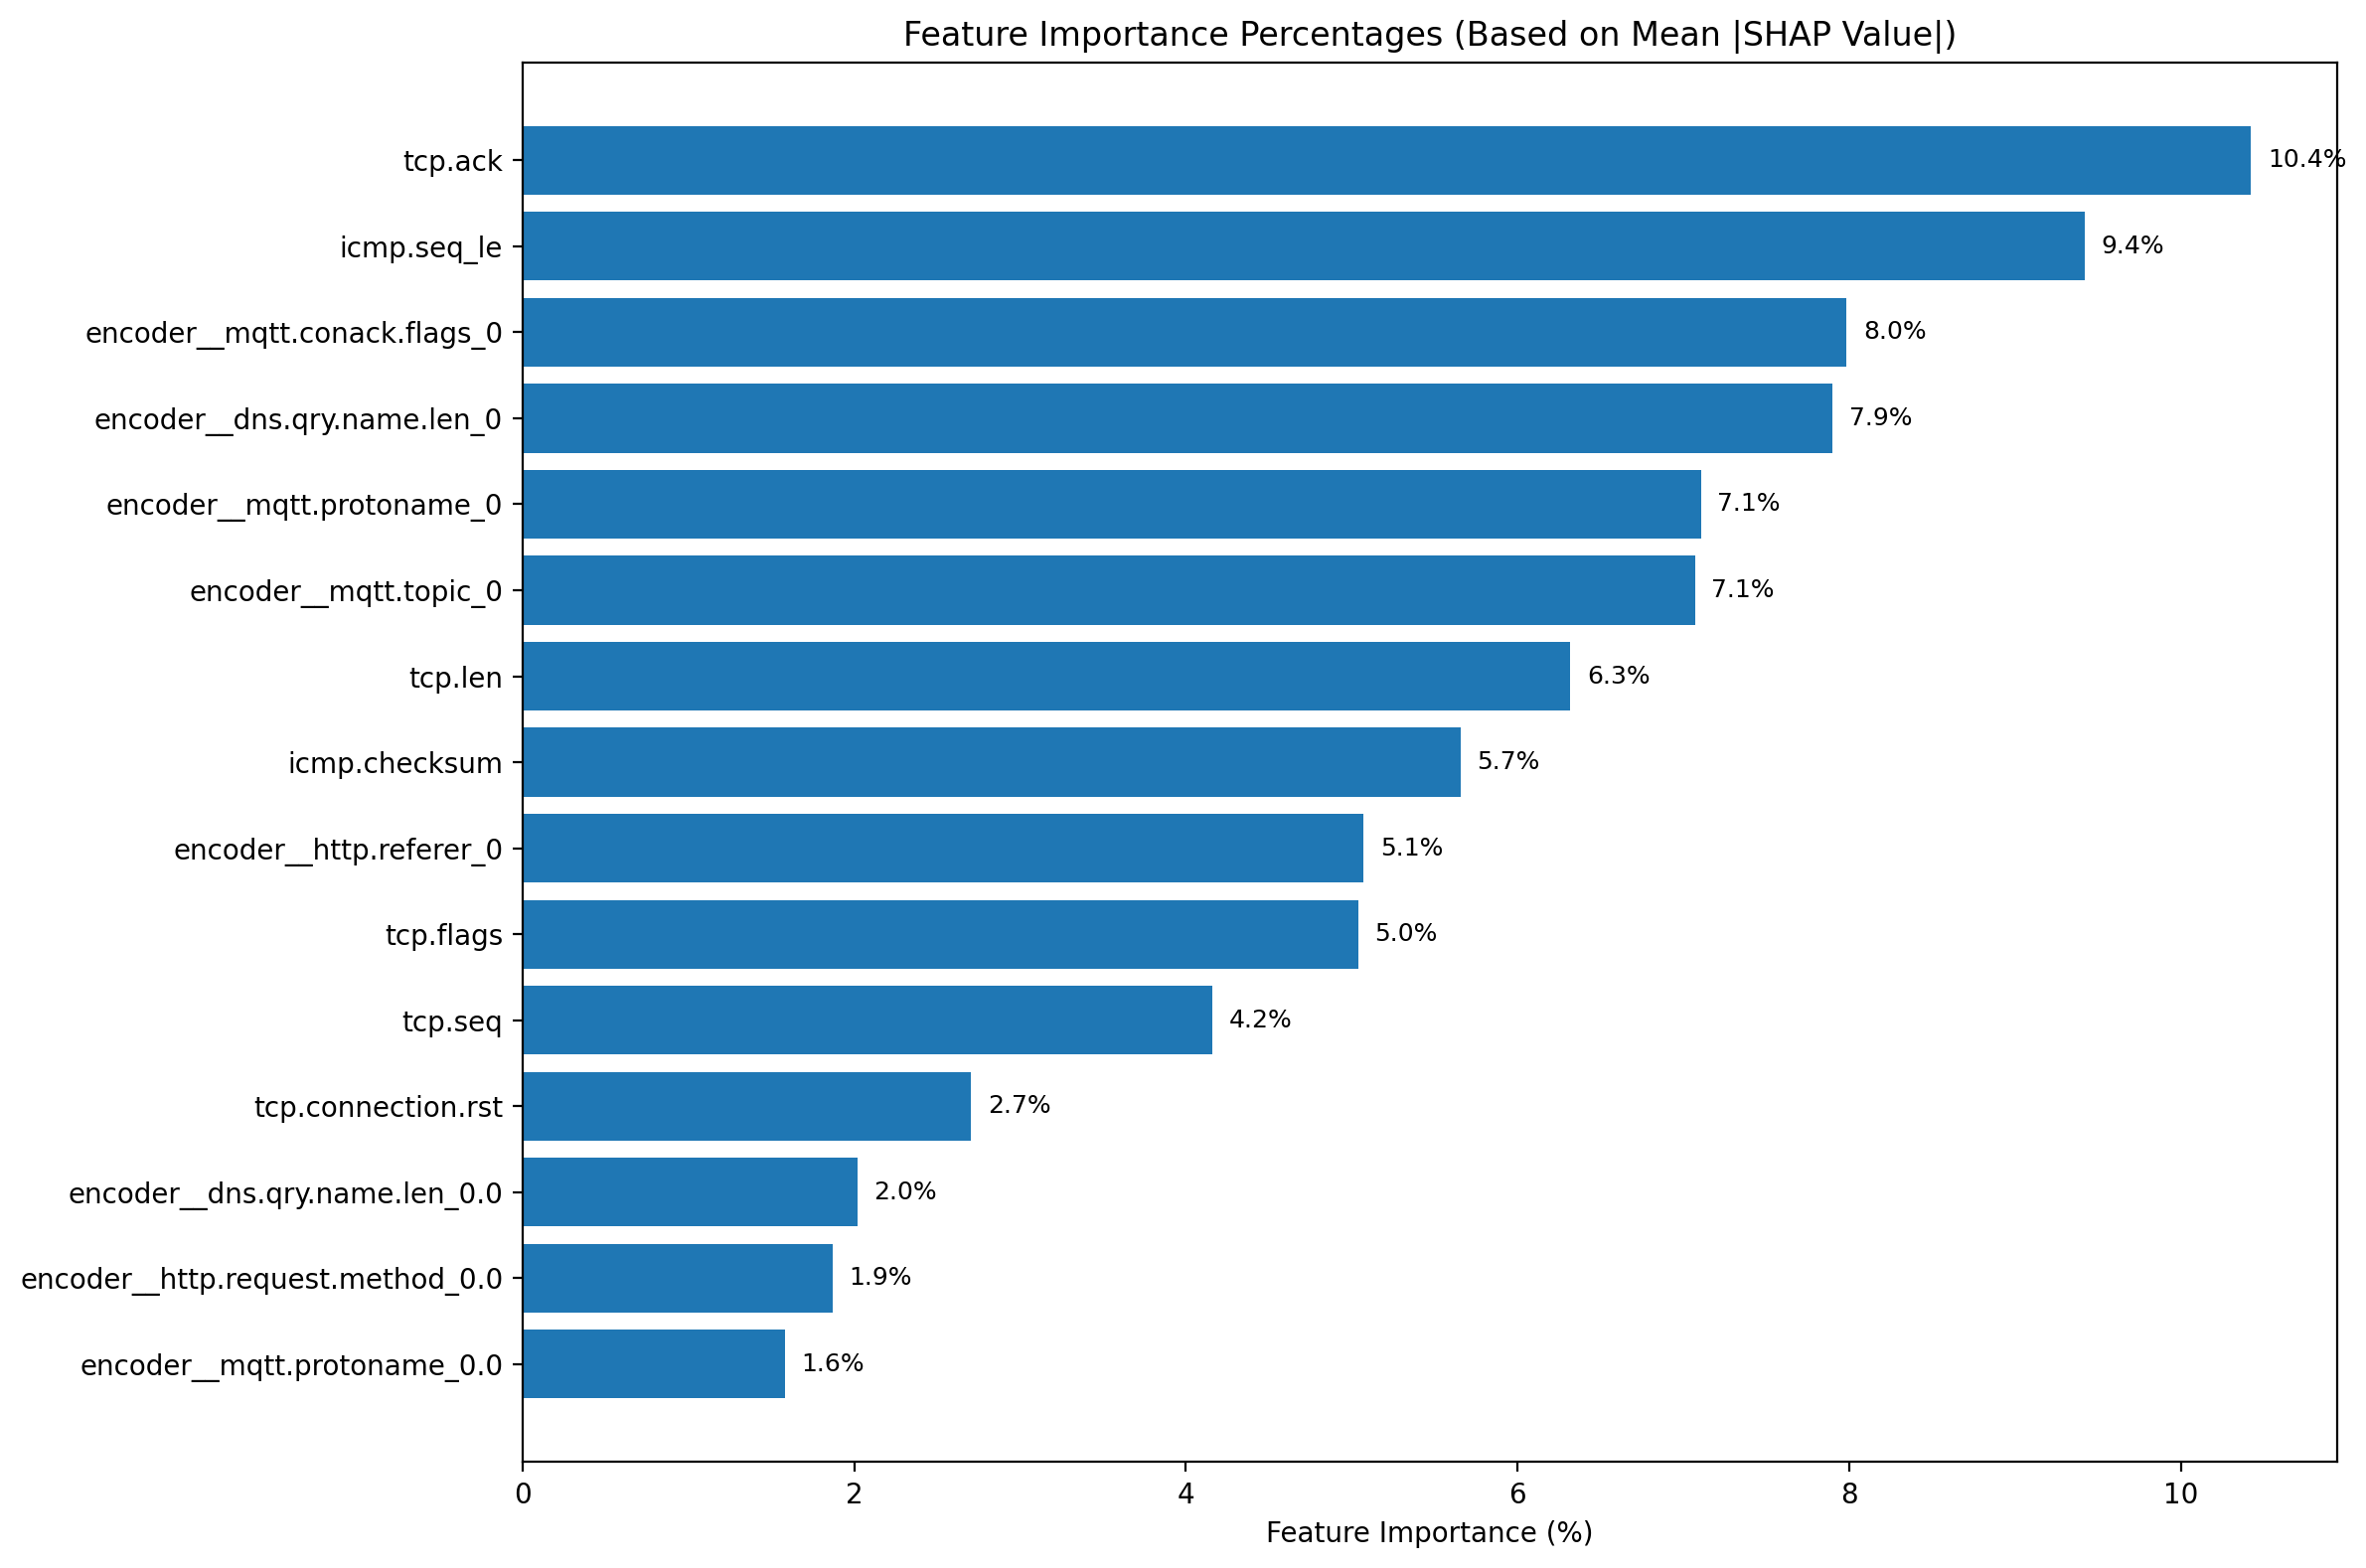


4. Generating SHAP bar plot...


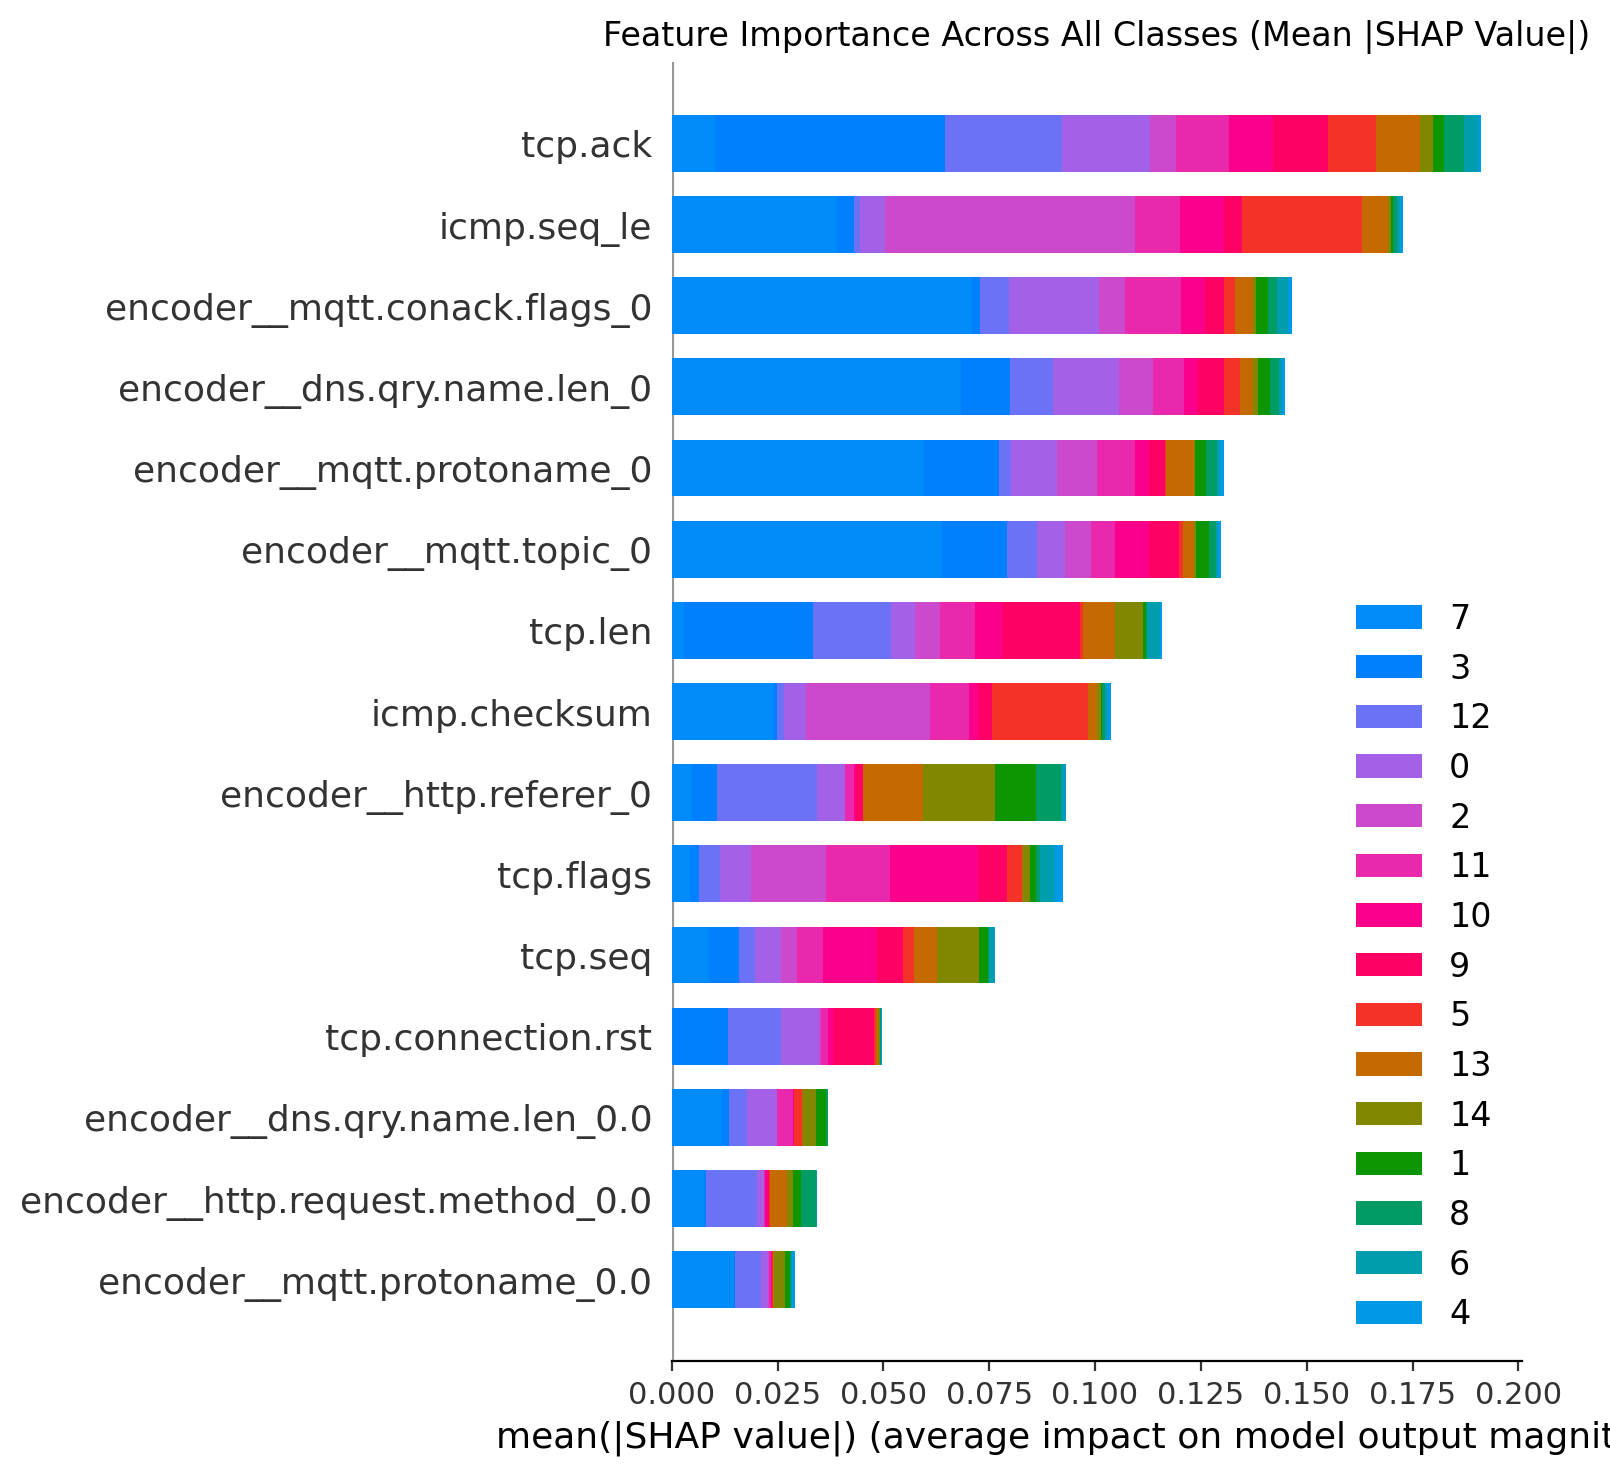


Summary:
Total features: 67
Top 5 features account for: 42.8% of total importance
Top 10 features account for: 72.0% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: tcp.ack (10.42%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)


In [10]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(f"\nGenerating SHAP explanations for the final global model...")

X_explainer = X_test.values[:100]
# X_explainer = X_test.values[:50]  # Subset of test data

# Select a representative background set (e.g., 100 samples)
background = shap.sample(X_train, 100) if len(X_train) > 100 else X_train

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, background)

# Compute SHAP values for the explanation set
shap_values = explainer.shap_values(X_explainer)

print(f"SHAP values shape: {[sv.shape for sv in shap_values] if isinstance(shap_values, list) else shap_values.shape}")
print(f"X_explainer shape: {X_explainer.shape}")
print(f"Number of classes: {len(model.classes_)}")

# # 1. Multi-class summary plot (shows all classes together)
# print("\n1. Generating multi-class summary plot...")
# shap.summary_plot(shap_values, X_explainer, feature_names=X_test.columns, 
#                   class_names=model.classes_)

# 2. Calculate feature importance percentages
print("\n2. Calculating feature importance percentages...")

# Handle SHAP values based on their structure
if isinstance(shap_values, list):
    # Multi-class case: shap_values is a list of arrays, one per class
    # Each array has shape (n_samples, n_features)
    mean_abs_shap = np.mean([np.abs(sv).mean(axis=0) for sv in shap_values], axis=0)
elif len(shap_values.shape) == 3:
    # Multi-class case: shap_values has shape (n_samples, n_features, n_classes)
    # Average across samples (axis=0) and classes (axis=2)
    mean_abs_shap = np.abs(shap_values).mean(axis=(0, 2))
else:
    # Binary classification case: shape (n_samples, n_features)
    mean_abs_shap = np.abs(shap_values).mean(axis=0)

print(f"Mean absolute SHAP shape after processing: {mean_abs_shap.shape}")

# Calculate percentages
total_importance = np.sum(mean_abs_shap)
feature_importance_pct = (mean_abs_shap / total_importance) * 100

# Get feature names - use the actual column names from X_test
feature_names = list(X_test.columns)
n_features = len(mean_abs_shap)

print(f"Number of features: {n_features}")
print(f"Number of feature names: {len(feature_names)}")

# Ensure feature names match the number of features
if len(feature_names) != n_features:
    print(f"Error: Feature names length ({len(feature_names)}) doesn't match SHAP values length ({n_features})")
    # Use available feature names or create generic ones
    if len(feature_names) > n_features:
        feature_names = feature_names[:n_features]
    else:
        feature_names.extend([f'feature_{i}' for i in range(len(feature_names), n_features)])

# Create DataFrame for easier handling
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_abs_shap,
    'percentage': feature_importance_pct
}).sort_values('importance', ascending=False)

# Display top features with percentages
print("\nTop 15 Features by Importance:")
print("=" * 50)
dict = {}
for idx, row in importance_df.head(15).iterrows():
    dict[row['feature']] = round(row['percentage'], 2)
    print(f"{row['feature']:<30}: {row['percentage']:.2f}%")
# Display least important features
print("\n5 Least Important Features:")
print("=" * 50)
for idx, row in importance_df.tail(5).iterrows():
    print(f"{row['feature']:<30}: {row['percentage']:.2f}%")

# 3. Bar plot with percentages
print("\n3. Generating feature importance bar plot with percentages...")
plt.figure(figsize=(12, 8))

# Get top 15 features for plotting
top_features = importance_df.head(15)

# Create horizontal bar plot
bars = plt.barh(range(len(top_features)), top_features['percentage'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance (%)')
plt.title('Feature Importance Percentages (Based on Mean |SHAP Value|)')

# Add percentage labels on bars
for i, (bar, pct) in enumerate(zip(bars, top_features['percentage'])):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{pct:.1f}%', va='center', fontsize=9)

plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

# 4. Alternative: Use SHAP's built-in bar plot but create custom percentage display
print("\n4. Generating SHAP bar plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_explainer, plot_type="bar",
                  feature_names=feature_names, class_names=model.classes_,
                  max_display=15, show=False)
plt.title("Feature Importance Across All Classes (Mean |SHAP Value|)")

# Add percentage text to the current plot
ax = plt.gca()
bars = ax.patches
# if len(bars) > 0:
#     # Get the importance values from the bars
#     bar_values = [bar.get_width() for bar in bars]
#     total_bar_value = sum(bar_values)
    
#     # Add percentage labels
#     for bar in bars:
#         width = bar.get_width()
#         percentage = (width / total_bar_value) * 100
#         ax.text(width + max(bar_values) * 0.01, bar.get_y() + bar.get_height()/2,
#                 f'{percentage:.1f}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# 5. Print summary statistics
print(f"\nSummary:")
print(f"Total features: {len(importance_df)}")
print(f"Top 5 features account for: {importance_df.head(5)['percentage'].sum():.1f}% of total importance")
print(f"Top 10 features account for: {importance_df.head(10)['percentage'].sum():.1f}% of total importance")
print(f"Bottom 5 features account for: {importance_df.tail(5)['percentage'].sum():.1f}% of total importance")
print(f"Most important feature: {importance_df.iloc[0]['feature']} ({importance_df.iloc[0]['percentage']:.2f}%)")
print(f"Least important feature: {importance_df.iloc[-1]['feature']} ({importance_df.iloc[-1]['percentage']:.2f}%)")

In [11]:
dict
# save to json
import json
with open('center.json', 'w') as f:
    json.dump(dict, f, indent=4)